In [ ]:
# Matt Garlock
# Florida Income vs Housing Costs Project
# 8-10-24

In [6]:
import pandas as pd
import sqlite3

# Load datasets
df_milestone2 = pd.read_csv('/Users/mattgarlock/Downloads/cleaned_output.csv')
df_milestone3 = pd.read_html('/Users/mattgarlock/Downloads/cleaned_data.html')[0]

# Read JSON file line by line
json_data = []
with open('/Users/mattgarlock/Downloads/cleaned_output_milestone4.json', 'r') as file:
    for line in file:
        json_data.append(json.loads(line))

# Normalize JSON data
df_milestone4 = pd.json_normalize(json_data)

# Creating a common field for demonstration purposes
df_milestone2['state'] = df_milestone2['regionname'].str.lower()
df_milestone3['state'] = df_milestone3['state'].str.lower()
df_milestone4['state'] = df_milestone4['County_Name'].str.extract(r',\s*([A-Za-z\s]+)$')[0].str.lower().str.strip()

# Merge the datasets
merged_df = pd.merge(df_milestone2, df_milestone3, on='state', how='left')
merged_df = pd.merge(merged_df, df_milestone4, on='state', how='left')

# Display the merged dataframe
print(merged_df.head())

# Connect to SQLite database
conn = sqlite3.connect('final_project.db')

# Store the merged dataframe into SQLite table
merged_df.to_sql('merged_data', conn, if_exists='replace', index=False)

# Close the connection
conn.close()


   regionid  sizerank regionname regiontype  statename    2000-01-31  \
0        54         1      Texas      state        NaN  112639.07492   
1        54         1      Texas      state        NaN  112639.07492   
2        54         1      Texas      state        NaN  112639.07492   
3        54         1      Texas      state        NaN  112639.07492   
4        54         1      Texas      state        NaN  112639.07492   

      2000-02-29     2000-03-31     2000-04-30     2000-05-31  ...  grocery  \
0  112700.285903  112729.974189  112877.319783  112972.743101  ...     96.2   
1  112700.285903  112729.974189  112877.319783  112972.743101  ...     96.2   
2  112700.285903  112729.974189  112877.319783  112972.743101  ...     96.2   
3  112700.285903  112729.974189  112877.319783  112972.743101  ...     96.2   
4  112700.285903  112729.974189  112877.319783  112972.743101  ...     96.2   

   housing  utilities  transportation  health  misc.              County_Name  \
0     82.1 

ValueError: could not convert string to float: 'texas'

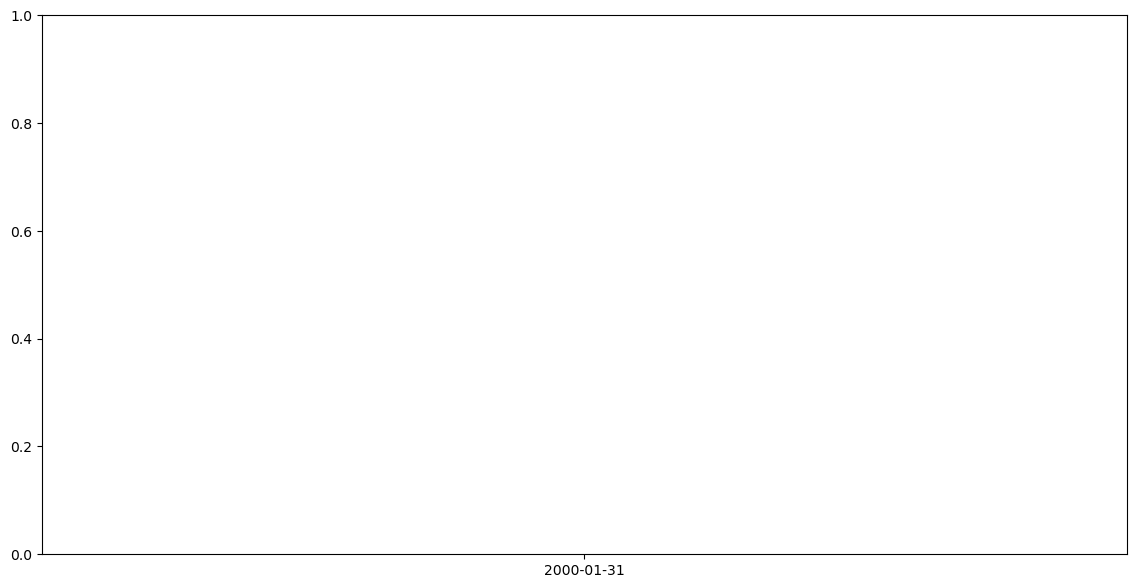

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the date columns (from index 5 to the end)
date_columns = merged_df.columns[5:313]  # Adjust based on your dataframe structure

# Line plot of housing prices over time for a specific region
plt.figure(figsize=(14, 7))

for state in merged_df['state'].unique():
    state_data = merged_df[merged_df['state'] == state]
    if not state_data.empty:
        plt.plot(date_columns, state_data.iloc[0, 5:313], label=state)

plt.legend()
plt.title('Housing Prices Over Time by State')
plt.xlabel('Year-Month')
plt.ylabel('Housing Price')
plt.xticks(rotation=45)
plt.show()


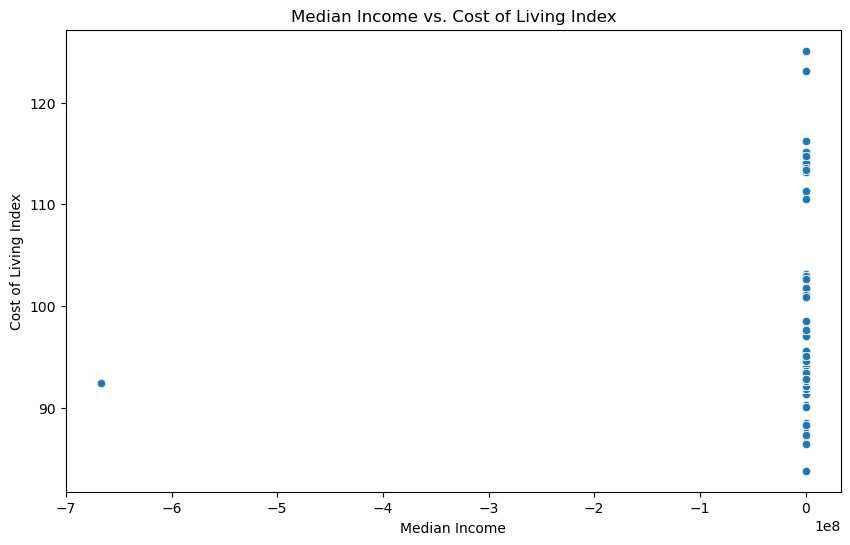

In [10]:
# Scatter plot of median income vs. cost of living index
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Median_Income', y='index', data=merged_df)
plt.title('Median Income vs. Cost of Living Index')
plt.xlabel('Median Income')
plt.ylabel('Cost of Living Index')
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


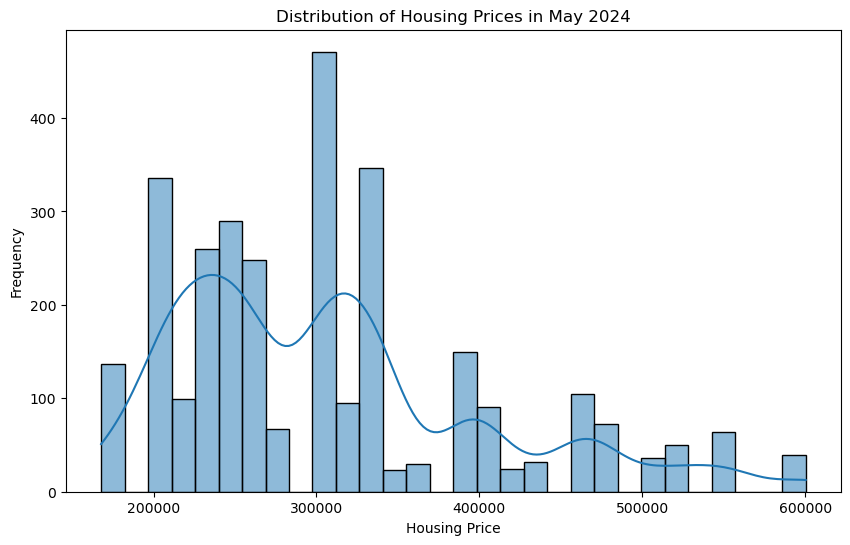

In [11]:
# Histogram of housing prices
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['2024-05-31'], bins=30, kde=True)
plt.title('Distribution of Housing Prices in May 2024')
plt.xlabel('Housing Price')
plt.ylabel('Frequency')
plt.show()


In [12]:
# Heatmap of correlation
plt.figure(figsize=(12, 8))
sns.heatmap(merged_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


ValueError: could not convert string to float: 'Texas'

<Figure size 1200x800 with 0 Axes>

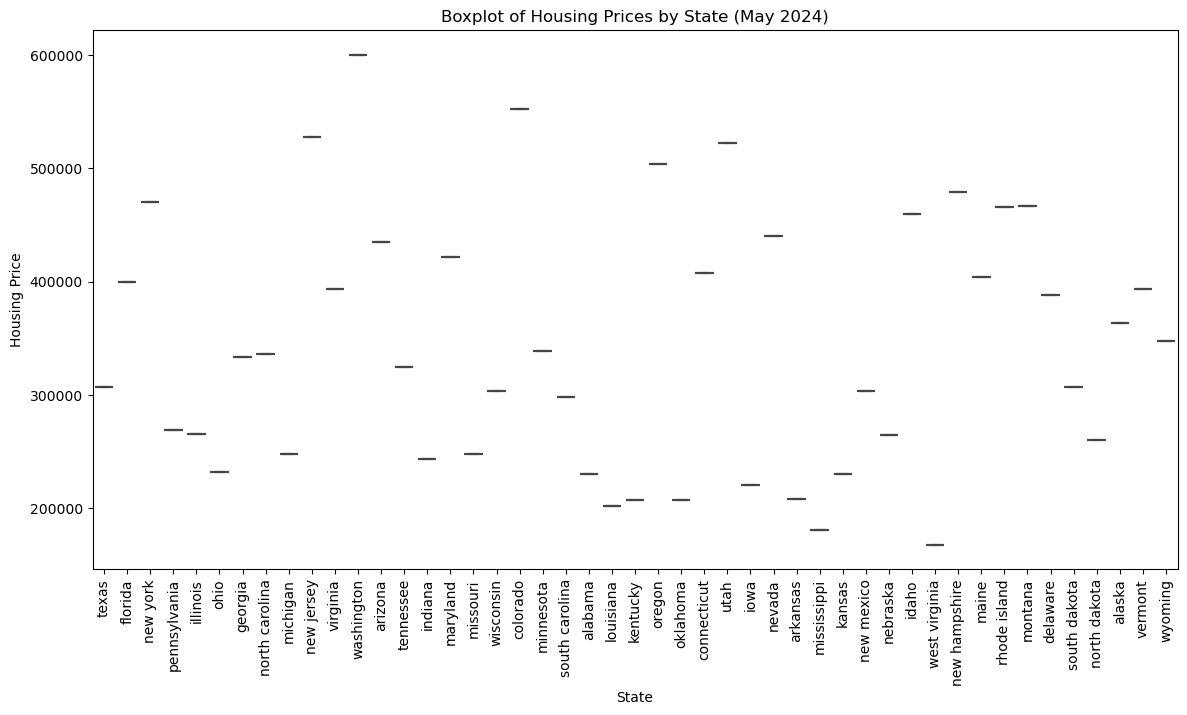

In [13]:
# Boxplot of housing prices by region
plt.figure(figsize=(14, 7))
sns.boxplot(x='state', y='2024-05-31', data=merged_df)
plt.title('Boxplot of Housing Prices by State (May 2024)')
plt.xlabel('State')
plt.ylabel('Housing Price')
plt.xticks(rotation=90)
plt.show()


In [ ]:
#Summary 

# In this project, I analyzed housing market prices in Florida and compared them to 
# median income levels across different regions. By merging multiple datasets and 
# visualizing the data, I was able to understand the affordability of housing in
# relation to income. There is a significant gap that is growing between the housing prices 
# and the median income. With this houses are becoming less and less afordable for the average
# family. The investment interest in houses might be a cause of this growth. Further 
# investigation is needed to determine the cause of the gap and if anything can be done to help
# fix it.

# Ethical Implications

# Changes made to the data: Data cleaning and transformation steps were performed to 
# ensure consistency and accuracy.
# Legal or regulatory guidelines: Housing and income data must comply with privacy
# regulations and be used ethically.
# Risks created by transformations: Data processing steps might introduce biases or 
# inaccuracies if not handled properly.
# Assumptions made: Assumptions about data consistency and completeness were made 
# during cleaning and merging.
# Data sourcing and verification: Data was sourced from credible sources and verified 
# for accuracy.
# Ethical implications: Ensuring the data is used ethically and responsibly, 
# respecting privacy and regulatory guidelines.
